In [1]:
import cluster
import cluster_physics as phys
from cluster_sim import ClusterSimulation
import matplotlib.pyplot as plt
MAX_NUMBER_MOLECULES = 50
T = 1300
number_clusters_start = 2
dt = 1e-8/phys.jump_rate(T)
dt = dt * 1e6
time_steps = int(1e5)


diffusivity 4.524817574332084e-22
diffusivity 4.178061697104496e-09


In [3]:
AVOGADRO = 6.022141e23
BOLTZMANN = 1.3806e-23
TEMP_INDEP_DIFFUSIVITY = 2e9
ACTIVATION_ENERGY = 4.4e5
JUMP_DISTANCE = 4.6*1e-10
CONSTANT_GAS = 8.314
import numpy as np
print('diffusivity', TEMP_INDEP_DIFFUSIVITY * np.exp(-ACTIVATION_ENERGY/(CONSTANT_GAS*750)))


diffusivity 4.524817574332084e-22


In [2]:
#time_step_array = [int(1e5), int(2e5), int(3e5), int(4e5), int(5e5)]
time_step_array = [int(1e4)]

x_array = []
y_array = []
for ts in time_step_array:
    sim = ClusterSimulation(T, ts)
    sim.simulate()
    x = sim.number_molecules_as_array()
    y = sim.number_clusters_as_array()
    x_array.append(x)
    y_array.append(y)

accumulated_time 1.8390728718024036e+20
accumulated_time 1.8390728717977707e+21


/home/alexandre_sureda/miniconda3/envs/neutronics/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0, 0.5, 'Number of clusters')

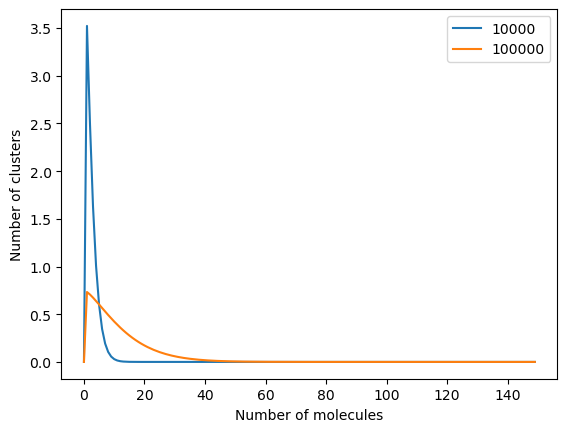

In [3]:
plt.figure()
for i in range(len(time_step_array)):
    plt.plot(x_array[i], y_array[i], label=str(time_step_array[i]))
plt.legend()
plt.xlabel("Number of molecules")
plt.ylabel("Number of clusters")


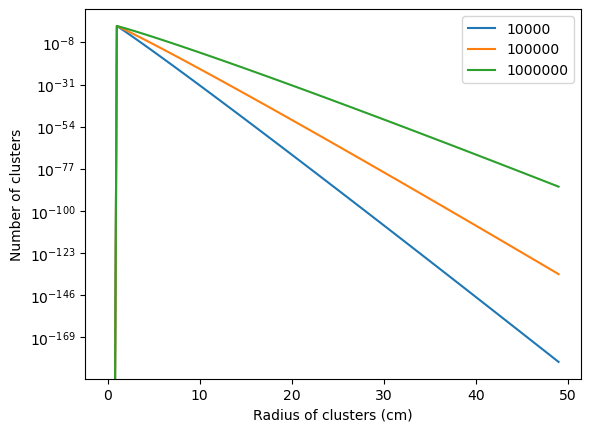

In [4]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure()
for i in range(len(time_step_array)):
    # Convert the keys of the dictionary to a list
    x_values = np.array(list(x_array[i]))
    y_values = np.array(list(y_array[i]))
    radius = ((3 / (4 * np.pi)) * x_values * 4.485 * 1e-23) ** (1/3)
    plt.semilogy(x_values, y_values, label=str(time_step_array[i]))

plt.legend()
plt.xlabel("Radius of clusters (cm)")
plt.ylabel("Number of clusters")
plt.show()
